# Applying Novel Approaches to Predict Yelp Ratings

## Synopsis

In our research we explore two novel methods for predicting user ratings on the domain of Yelp businesses. We provide a prospective business advertiser/marketer/researcher a detailed comparison of the differences between methods and suggest practical considerations for their usage.

Keywords: Machine Learning; Collaborative Filtering; Ensemble Models; Factorization Machines

#### Contributors:
- EK Itoku | UNI: ii2155 | Email: ii2155@columbia.edu
- Jason Kuo | UNI: jk4097 | Email: jk4097@columbia.edu
- Sean Xu | UNI: cx2118 | Email: cx2118@columbia.edu


#### Report Layout:

* Objectives
* Recommendation Approaches
* Evaluation Metrics
* Analysis of Results
    + Comparison of Training Data Size
    + Comparison of Hyperparameter Tuning
* Implementation Considerations
* Conclusions and Takeaways
* References

In [1]:
# Import all the necessary packages and modules
import numpy as np
import pickle
import pandas as pd
from source.utils import plot_lines, create_quantile_bucket
pd.options.display.float_format = '{:4.2f}'.format
%matplotlib inline

# Pickle file-paths


# Constants
DEFAULT_SAMPLE_SIZE = 50 # 50,000 users
QUANTILES = 10

___

## Objectives

In this study we aim to predict the rating of the last business a Yelp user visits. A rating is on the scale of 0 - 5 with 5 representing great. For marketing companies, this can be invaluable in identifying potential users who will like a targeted business and only focus advertising to those users with high predicted ratings.

## Recommendation Approaches


### Bias (Baseline Method)

As a baseline, we considered an approach to predict based on user and business biases. 


### Model-based Collaborative Filtering (Matrix Factorization)

Instead of having to load up the entire database to make a new recommendation for a user, we can employ a representation of the user-item database in a set of two smaller rank matricies across a shared latent vector space. The two matricies can be combined to recover the initial interactions in addition to infering predictions from missing interactions. We leverage the ALS model through Spark ML to serve as the foundational model and apply cross validation through 2-folds in order to tune hyperparameters for improving model accuracy.

### Ensemble Method

We considered a model of models approach combining a neighborhood based model, SVD, baselineonly
& co-colustering.


### Factorization Machines





## Evaluation Metrics

To achieve our objective, we used two different evaluation schemes:


### Root Mean Squared Error (Primary Benchmark)

We use the root mean squared error benchmark (RMSE) to measure the deviation of our predicted rating from the true rating in our testing set. A lower result is better signaling less prediction error.


### Mean Absolute Error (Secondary Benchmark)

RMSE penalizes the larger deviations from the true rating more than similarly spaced apart smaller deviations when the total amount of deviation is the same. Mean Absolute Error (MAE) measures all deviations similarly. 

## Experiment Setup


### Sampling Methodology

We start by selecting the business ratings of 50k users to ensure an adequate coverage of users and businesses. We remove users with less than 5 rating interactions to ensure we have enough data to train/test for the holdout last rating. We then remove business from the dataset with less than 50 ratings to both limit the data and to account for user aversion for trusting less reviewed businesses. We split the data into train-test by removing the latest review per user as the test set.

## Analysis of Results


### Model Accuracy

#### Baseline (Most Popular 5 Movies)

TODO: Update for yelp project

In our baseline method we achieved a RMSE of 1.006 and precision of 0.0337 on the test data.

#### Neighborhood-Based

In [2]:
# with open(path_nb_result, 'rb') as f:
#     nb_result = pickle.load(f)

# test_acc = nb_result.loc[nb_result.sample_size == DEFAULT_SAMPLE_SIZE, ['rmse_test', 'top_k_precision_test']].values[0]

# print("In our neighborhood-based method we achieved a RMSE of {0} and precision of {1} on the test data."
#       .format(round(test_acc[0],4), round(test_acc[1],4)))

In our neighborhood-based method we achieved a RMSE of 0.9383 and precision of 0.527 on the test data.


#### Model-Based

In [3]:
# with open(path_als_result, 'rb') as f:
#     als_result = pickle.load(f)
    
# test_acc = als_result.loc[als_result.sample_size == DEFAULT_SAMPLE_SIZE, ['rmse_test', 'top_k_precision_test']].values[0]

# print("In our model-based method we achieved a RMSE of {0} and precision of {1} on the test data."
#       .format(round(test_acc[0],4), round(test_acc[1],4)))

In our model-based method we achieved a RMSE of 0.9262 and precision of 0.4987 on the test data.


TODO: Update for yelp project

Surprisingly, our baseline popularity method did resonably well in test RMSE however it predictably did poor on the precision side. The neighborhood model improved RMSE and notably precision vs. the baseline. Finally, our model-based method performed the best with RMSE and slightly worse on precision vs. the NB method on the test dataset. 

### Comparison of Training Data Size 

We explore the impacts of varying the data size from 50k user-movie iteractions up to 150k interactions.

#### Neighborhood-Based

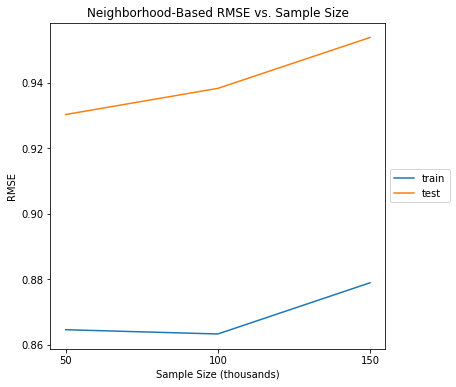

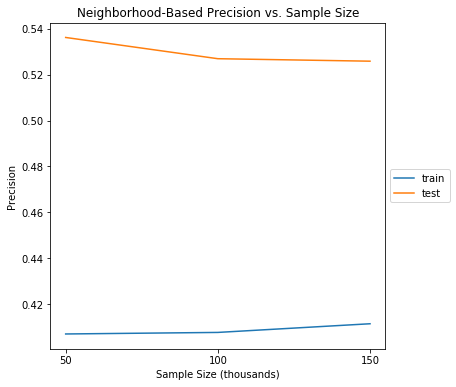

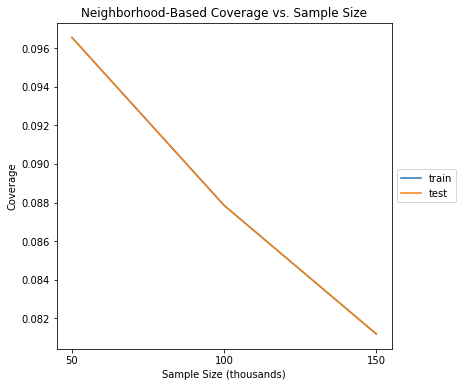

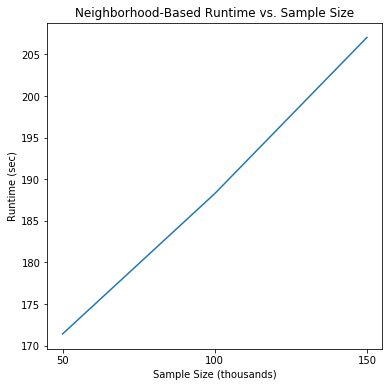

In [4]:
# label = ['train', 'test']

# nb_rmse = nb_result[['rmse_train', 'rmse_test']]
# plot_lines(nb_result.sample_size, nb_rmse, 'Neighborhood-Based RMSE vs. Sample Size', 'Sample Size (thousands)', 'RMSE', label)

# nb_precision = nb_result[['top_k_precision_train', 'top_k_precision_test']]
# plot_lines(nb_result.sample_size, nb_precision, 'Neighborhood-Based Precision vs. Sample Size', 'Sample Size (thousands)', 'Precision', label)

# nb_coverage = nb_result[['coverage_train', 'coverage_test']]
# plot_lines(nb_result.sample_size, nb_coverage, 'Neighborhood-Based Coverage vs. Sample Size', 'Sample Size (thousands)', 'Coverage', label)

# nb_runtime = nb_result[['runtime']]
# plot_lines(nb_result.sample_size, nb_runtime, 'Neighborhood-Based Runtime vs. Sample Size', 'Sample Size (thousands)', 'Runtime (sec)')

TODO: Update for yelp project

Interestingly in our neighborhood-based method, RMSE and precision worsened as the dataset increased from 50k to 150k. We initially expected that the introduction of additional data would improve the number of peers to compare to in order to improve accuracy. However, it would make sense that expanding the universe of movies other users are rating can introduce noise/complexity in the recommendations as the data grows. We introduce a coverage metric to assess the diversity of recommendations made. Coverage is calculated by taking the number of unique movies recommended vs. the total catalogue of movies in the data set. Coverage decreased linearly with data size (possibly due to the growth of possible movies to recommend) while runtime has shown that the model scaled fairly linearly. The researchers noted that while runtime was resonable, the memory demands made the method unable to be run past 150k datapoints on a 16gb machine making this method unscalable for huge datasets without large memory capacity.

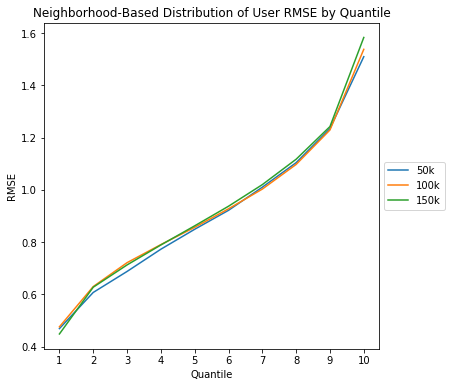

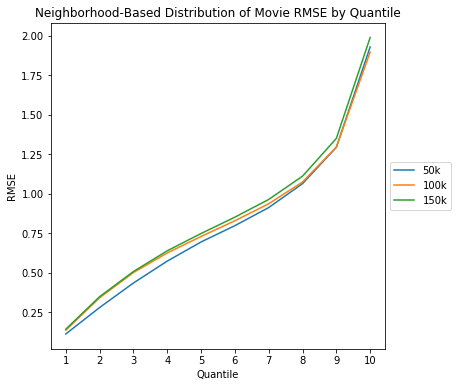

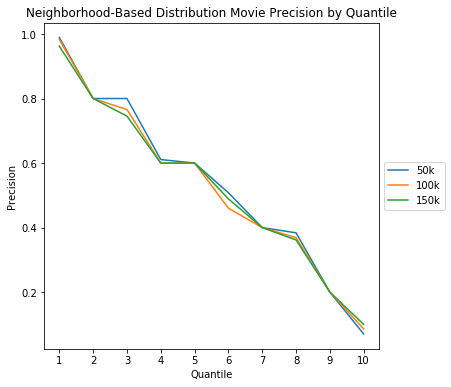

In [5]:
# # Distribution of rating metrics across users and movies

# with open(path_nb_50k_dist_rmse_user, 'rb') as f:
#     nb_50k_dist_rmse_user = pickle.load(f)

# with open(path_nb_100k_dist_rmse_user, 'rb') as f:
#     nb_100k_dist_rmse_user = pickle.load(f)
    
# with open(path_nb_150k_dist_rmse_user, 'rb') as f:
#     nb_150k_dist_rmse_user = pickle.load(f)
    
# with open(path_nb_50k_dist_rmse_movie, 'rb') as f:
#     nb_50k_dist_rmse_movie = pickle.load(f)
    
# with open(path_nb_100k_dist_rmse_movie, 'rb') as f:
#     nb_100k_dist_rmse_movie = pickle.load(f)
    
# with open(path_nb_150k_dist_rmse_movie, 'rb') as f:
#     nb_150k_dist_rmse_movie = pickle.load(f)
    
# with open(path_nb_50k_dist_precision_movie, 'rb') as f:
#     nb_50k_dist_precision_movie = pickle.load(f)
    
# with open(path_nb_100k_dist_precision_movie, 'rb') as f:
#     nb_100k_dist_precision_movie = pickle.load(f)
    
# with open(path_nb_150k_dist_precision_movie, 'rb') as f:
#     nb_150k_dist_precision_movie = pickle.load(f)
    
# user_rmse_quantile = pd.concat([create_quantile_bucket(nb_50k_dist_rmse_user[0], QUANTILES), 
#                      create_quantile_bucket(nb_100k_dist_rmse_user[0], QUANTILES), 
#                      create_quantile_bucket(nb_150k_dist_rmse_user[0], QUANTILES)], axis=1).reset_index(drop=True)

# movie_rmse_quantile = pd.concat([create_quantile_bucket(nb_50k_dist_rmse_movie[0], QUANTILES), 
#                       create_quantile_bucket(nb_100k_dist_rmse_movie[0], QUANTILES),
#                       create_quantile_bucket(nb_150k_dist_rmse_movie[0], QUANTILES)], axis=1).reset_index(drop=True)
    
# movie_precision_quantile = pd.concat([create_quantile_bucket(nb_50k_dist_precision_movie[0], QUANTILES, sort_asc=False), 
#                             create_quantile_bucket(nb_100k_dist_precision_movie[0], QUANTILES, sort_asc=False),
#                             create_quantile_bucket(nb_150k_dist_precision_movie[0], QUANTILES, sort_asc=False)], axis=1).reset_index(drop=True)

# legend_lab = ['50k', '100k', '150k']
# q_lab = np.arange(QUANTILES)+1

# plot_lines(q_lab, user_rmse_quantile, 'Neighborhood-Based Distribution of User RMSE by Quantile', 'Quantile', 'RMSE', legend_lab)
# plot_lines(q_lab, movie_rmse_quantile, 'Neighborhood-Based Distribution of Movie RMSE by Quantile', 'Quantile', 'RMSE', legend_lab)
# plot_lines(q_lab, movie_precision_quantile, 'Neighborhood-Based Distribution Movie Precision by Quantile', 'Quantile', 'Precision', legend_lab)

TODO: Update for yelp project

We would also like to ensure the distribution of the accuracy of our predictions is resonable across our users and movies. By bucketing the scores of either the users or movies into 10 different quantile bins (each number can be interpretated as increments of 10th percentiles), we can see the spread of accuracy scores and how it differs across the recommeded set. On user and movie RMSE, we can see a sharp uptick in RMSE scores for the worst users (in quantile 10) vs. the other 9 quantiles. For the precision score we only analyze this on a user-perspective of which the data shows a more linear degredation of scores from best to worst quantile bands. Increasing the data size did not notably improve RMSE but provided a more smooth linear degredation for the precision score (green 150k line).

#### Model-Based

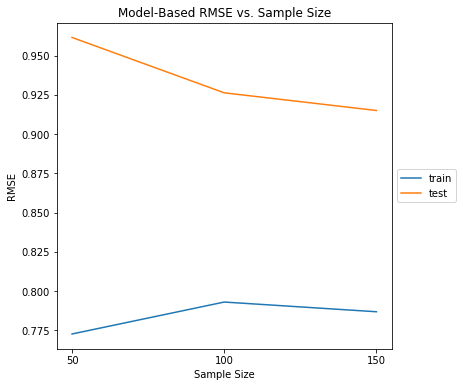

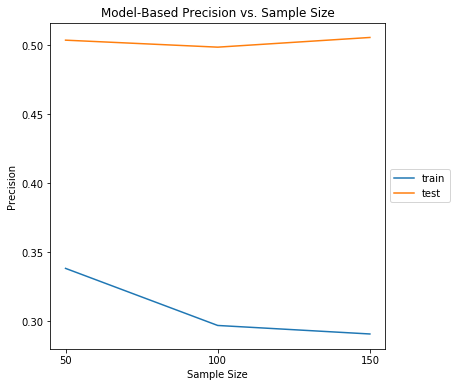

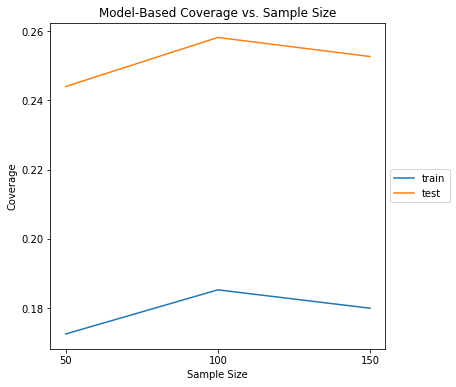

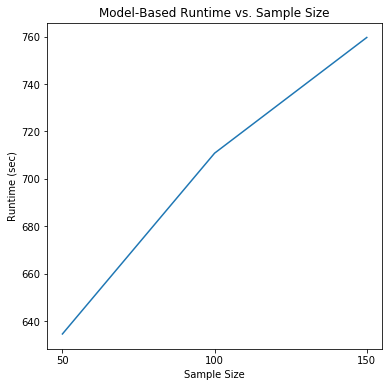

In [6]:
# TODO: Update for yelp project

# label = ['train', 'test']

# als_rmse = als_result[['rmse_train', 'rmse_test']]
# plot_lines(als_result.sample_size, als_rmse, 'Model-Based RMSE vs. Sample Size', 'Sample Size', 'RMSE', label)

# als_precision = als_result[['top_k_precision_train', 'top_k_precision_test']]
# plot_lines(als_result.sample_size, als_precision, 'Model-Based Precision vs. Sample Size', 'Sample Size', 'Precision', label)

# als_coverage = als_result[['coverage_train', 'coverage_test']]
# plot_lines(als_result.sample_size, als_coverage, 'Model-Based Coverage vs. Sample Size', 'Sample Size', 'Coverage', label)

# als_runtime = als_result[['runtime']]
# plot_lines(als_result.sample_size, als_runtime, 'Model-Based Runtime vs. Sample Size', 'Sample Size', 'Runtime (sec)')

TODO: Update for yelp project

In comparison to the neighborhood-based model, test RMSE improved as we increased the data size as the model generalized predictions better with the new information. Precision remained flat at 50% on the test data. Coverage also remained flat as data increased but was notably higher at ~25% vs. 9% for neighborhood-based, reflecting a higher diversity of recommendations. Similarly, runtime increased less than linearly as sample size grew (the absolute time is longer than neighborhood-based due to additional CV validation). This runtime improvement could be from the model generalizing well on a smaller latent space.

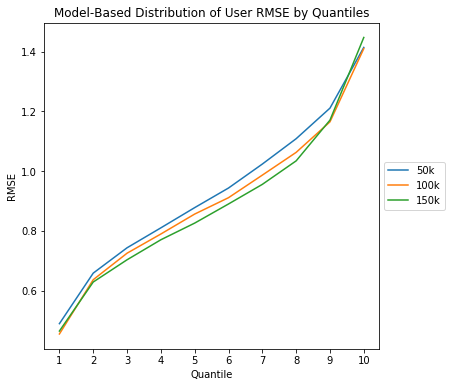

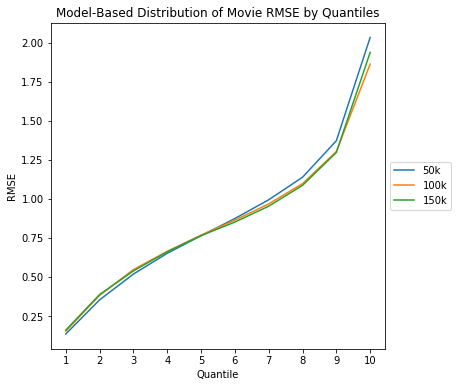

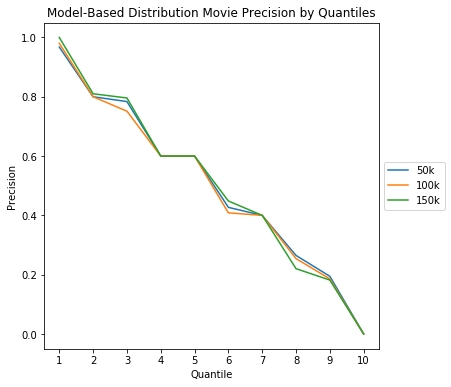

In [7]:
# # Distribution of rating metrics across users and movies

# with open(path_als_50k_dist_rmse_user, 'rb') as f:
#     als_50k_dist_rmse_user = pickle.load(f)

# with open(path_als_100k_dist_rmse_user, 'rb') as f:
#     als_100k_dist_rmse_user = pickle.load(f)
    
# with open(path_als_150k_dist_rmse_user, 'rb') as f:
#     als_150k_dist_rmse_user = pickle.load(f)
    
# with open(path_als_50k_dist_rmse_movie, 'rb') as f:
#     als_50k_dist_rmse_movie = pickle.load(f)
    
# with open(path_als_100k_dist_rmse_movie, 'rb') as f:
#     als_100k_dist_rmse_movie = pickle.load(f)
    
# with open(path_als_150k_dist_rmse_movie, 'rb') as f:
#     als_150k_dist_rmse_movie = pickle.load(f)
    
# with open(path_als_50k_dist_precision_movie, 'rb') as f:
#     als_50k_dist_precision_movie = pickle.load(f)
    
# with open(path_als_100k_dist_precision_movie, 'rb') as f:
#     als_100k_dist_precision_movie = pickle.load(f)
    
# with open(path_als_150k_dist_precision_movie, 'rb') as f:
#     als_150k_dist_precision_movie = pickle.load(f)
    
# user_rmse_quantile = pd.concat([create_quantile_bucket(als_50k_dist_rmse_user[0], QUANTILES), 
#                      create_quantile_bucket(als_100k_dist_rmse_user[0], QUANTILES), 
#                      create_quantile_bucket(als_150k_dist_rmse_user[0], QUANTILES)], axis=1).reset_index(drop=True)

# movie_rmse_quantile = pd.concat([create_quantile_bucket(als_50k_dist_rmse_movie[0], QUANTILES), 
#                       create_quantile_bucket(als_100k_dist_rmse_movie[0], QUANTILES),
#                       create_quantile_bucket(als_150k_dist_rmse_movie[0], QUANTILES)], axis=1).reset_index(drop=True)
    
# movie_precision_quantile = pd.concat([create_quantile_bucket(als_50k_dist_precision_movie[0], QUANTILES, sort_asc=False), 
#                             create_quantile_bucket(als_100k_dist_precision_movie[0], QUANTILES, sort_asc=False),
#                             create_quantile_bucket(als_150k_dist_precision_movie[0], QUANTILES, sort_asc=False)], axis=1).reset_index(drop=True)

# legend_lab = ['50k', '100k', '150k']
# q_lab = np.arange(QUANTILES)+1

# plot_lines(q_lab, user_rmse_quantile, 'Model-Based Distribution of User RMSE by Quantiles', 'Quantile', 'RMSE', legend_lab)
# plot_lines(q_lab, movie_rmse_quantile, 'Model-Based Distribution of Movie RMSE by Quantiles', 'Quantile', 'RMSE', legend_lab)
# plot_lines(q_lab, movie_precision_quantile, 'Model-Based Distribution Movie Precision by Quantiles', 'Quantile', 'Precision', legend_lab)

TODO: Update for yelp project

We can see that the improvements for RMSE in the model were more significant for the vast middle-band of users (within 2-9 quantile bands) as data sizes increased. The movie RMSE remained linear and unchanged as data scaled however this is less significant for our suggested use case focusing on user recommendations. The distribution for precision across quantiles looks less clear as data grows but looks to degrade fairly linearly.

### Comparison of Hyper Parameter Tuning

#### Neighborhood-Based: Increasing K-Neighbors

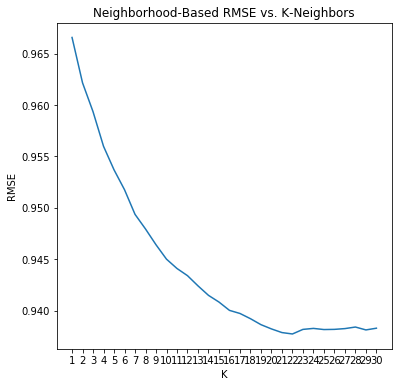

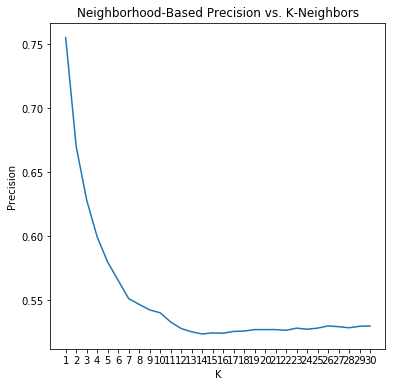

In [8]:
# with open(path_nb_100k_hyper_rmse, 'rb') as f:
#     nb_100k_hyper_rmse = pickle.load(f)
    
# with open(path_nb_100k_hyper_precision, 'rb') as f:
#     nb_100k_hyper_precision = pickle.load(f)

# k = nb_100k_hyper_rmse[1].values
# rmse = nb_100k_hyper_rmse[2].values
# precision = nb_100k_hyper_precision[2].values
    
# plot_lines(k, rmse, 'Neighborhood-Based RMSE vs. K-Neighbors', 'K', 'RMSE')
# plot_lines(k, precision, 'Neighborhood-Based Precision vs. K-Neighbors', 'K', 'Precision')

In [9]:
# min_rmse_idx = np.argmin(rmse)
# best_k = k[min_rmse_idx]
# lowest_RMSE = rmse[min_rmse_idx]
# print("K of {0} looks to be the result with the lowest RMSE ({1}) on the test data."
#       .format(round(best_k,4), round(lowest_RMSE,4)))

# max_precision_idx = np.argmax(precision)
# best_k = k[max_precision_idx]
# highest_precision = precision[max_precision_idx]
# print("K of {0} looks to be the result with the highest precision ({1}) on the test data."
#       .format(round(best_k,4), round(highest_precision,4)))

K of 22 looks to be the result with the lowest RMSE (0.9377) on the test data.
K of 1 looks to be the result with the highest precision (0.7552) on the test data.


TODO: Update for yelp project

From the data, we can see the hyperparameter K for the number of neighbors to calculate similarity with can be tuned to improved RMSE however at a cost of precision. It appears that using a smaller clique of peers improves the likelihood of finding a desirable top 5 movie however it comes with a tradeoff of being less accurate in predicting its exact rating. Perhaps favoring precision in this tradeoff is resonable for a business to optimize if they are looking to maximize movie visits and worry less about how people thought of them.

#### Model-Based: Increasing Regularization Parameter (λ)

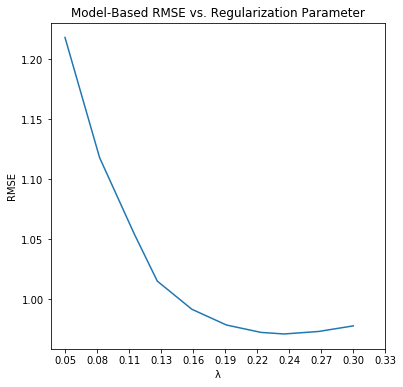

In [10]:
#TODO: Update for yelp project

# with open(path_als_100k_hyper_rmse, 'rb') as f:
#     als_100k_hyper_rmse = pickle.load(f)

# lam_cv = als_100k_hyper_rmse[1].values
# rmse_cv = als_100k_hyper_rmse[2].values

# param_size = int(len(lam_cv)/CV_K_FOLDS)
# lam = lam_cv[:param_size]
# rmse_per_kfold = np.array_split(rmse_cv, CV_K_FOLDS)
# rmse = np.mean(rmse_per_kfold, axis=0)

# plot_lines(lam, rmse, 'Model-Based RMSE vs. Regularization Parameter', 'λ', 'RMSE')

In [11]:
#TODO: Update for yelp project

# min_rmse_idx = np.argmin(rmse)
# best_lamda = lam[min_rmse_idx]
# lowest_RMSE = rmse[min_rmse_idx]
# print("Lambda of {0} looks to be the result with the lowest RMSE ({1}) on the test data."
#       .format(round(best_lamda,4), round(lowest_RMSE,4)))

Lambda of 0.24 looks to be the result with the lowest RMSE (0.9709) on the test data.


TODO: Update for yelp project

As we tweaked the regularization parameter lambda, we were able to find an optimal level to minimize RMSE. This lambda is used for the Alternating Least Squares algorithm to generalize the model better through introducing penalty to latent factor weights.

In our final model we tuned additional hyperparameters for max iterations the model should run and rank (dimensionality of latent factors) through cross validation however due to model package limitations were unable to extract the outputs in an efficient manner. Similarly, the precision metric was not easily exposed on a hyperparameter tuning level of which we omit.

## Implementation Considerations

For any business looking to employ one of these methods into real-world use, they should consider the following:

#### Cold Start

TODO: Update for yelp project

In the case the business has no existing user-item recommendation data, the company can ensure a randomized selection of movie predictions in order to generate a dataset with a resonable selection of movies to recommend. As we seen in data scaling, introducing too wide of a selection of movies can make prediction accuracy suffer due to the sparcity of ratings in the neighborhood-based method but can be partially addressed in the model-based matrix factorization method.

#### New Users

TODO: Update for yelp project

With no existing data, it is question on how to provide an appropriate recommendation for new users. We suggest an employing a popularity-based approach (i.e. suggesting the top-k most popular items) as it has been shown to provide a decent performance vs. the methods incorporating additional user data. The business can continue to approach until the user has accumulated a sufficient number movie interactions at which the predictions can be reliably estimated (a business rule threshold for the number of required ratings can be implemented). In a follow-up we would like to explore this frontier of number of movie ratings vs. prediction accuracy. From this data, a business may want to employ multiple models for light-users and heavy-users of the platform using the number of ratings as a proxy.

#### Online vs. Offline

TODO: Update for yelp project

We would recommend matrix factorization for an online method as the results shows it provides good accuracy as data grows and its latent factor representation is more scalable in runtime (based on our observations of less than linear growth from 50k to 150k datapoints) and memory (unable to run past 150k datapoints using a high-end consumer laptop). Hosting the entire growing dataset to provide a neighborhood-based recommendation will see rapidly increasing resource demands.


#### Method Accuracy

TODO: Update for yelp project

A method that provides a < 20%  precision of a top 5 recommendation approach (1/5 = 20%) may be considered insufficient for the business to release as it is not able to recommend a single movie an user will watch reliably. Thus the business can establish a minimal accuracy threshold as a business rule for real-world implementation. In our experiment, the popularity based baseline would not meet this hurdle while both collaborative filtering method would pass.


#### Recommendation Diversity

TODO: Update for yelp project

Recommendation diversity, as measured by our coverage metric, can be a notable consideration. A business like Netflix could favor a high level of coverage across their catalogue to limit their showings of a smaller selection of blockbuster movies if they a higher pay-per-view licensing fee to content distributors. If they could recommend more indie or niche movies while providing high levels of user engagement then they could save on licensing costs.


## Conclusions and Takeaways

TODO: Update for yelp project

We have shown that both memory-based and model-based collaborative filtering approaches are effective at providing movie recommendations better in terms of accuracy and diversity than a baseline popularity-based approach. We provided practical implementation considerations for businesses wishing to adopt one of our approaches. We have developed a Spark ML implementation of the collaborative filtering methods that takes advantage of a distributed computing framework for easier resource scaling. The researchers would like to continue to investigate the impact of the number of user ratings on accuracy, effects of even larger datasets and taking into consideration the types of movie genres or release years the user has rated as a input to improve recommendations.






## References

1: https://towardsdatascience.com/precision-vs-recall-386cf9f89488